<a href="https://colab.research.google.com/github/Goodevil01/Data-Prep-Ca1-/blob/main/Strategic_Thinking_Ca2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.preprocessing.sequence import TimeseriesGenerator
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LSTM, Dropout, Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
df = df = pd.read_csv('/content/drive/MyDrive/BTC-USD.csv')


In [123]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
1,2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
2,2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800
3,2015-01-06,274.610992,287.553009,272.696014,286.188995,286.188995,23245700
4,2015-01-07,286.076996,298.753998,283.079010,294.337006,294.337006,24866800


In [124]:
df.shape

(3104, 7)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3104 entries, 0 to 3103
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3104 non-null   object 
 1   Open       3104 non-null   float64
 2   High       3104 non-null   float64
 3   Low        3104 non-null   float64
 4   Close      3104 non-null   float64
 5   Adj Close  3104 non-null   float64
 6   Volume     3104 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 169.9+ KB


In [40]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3104.000000,3104.000000,3104.000000,3104.000000,3104.000000,3.104000e+03
mean,14041.039379,14385.041532,13664.743745,14049.414854,14049.414854,1.715624e+10
std,16095.940891,16500.087552,15634.140273,16093.557426,16093.557426,1.962263e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,1.060090e+07
25%,1035.762481,1052.200043,1014.922485,1037.797515,1037.797515,2.255415e+08
50%,8051.509277,8227.814941,7841.081788,8050.035400,8050.035400,1.216461e+10
75%,20629.445801,21144.436035,20235.452637,20648.897949,20648.897949,2.825679e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [41]:
print(df.duplicated().sum())


0


In [42]:
null_values = df.isnull().sum()
print(null_values)


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [43]:
df['Date'] = pd.to_datetime(df['Date'])

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3104 entries, 0 to 3103
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3104 non-null   datetime64[ns]
 1   Open       3104 non-null   float64       
 2   High       3104 non-null   float64       
 3   Low        3104 non-null   float64       
 4   Close      3104 non-null   float64       
 5   Adj Close  3104 non-null   float64       
 6   Volume     3104 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 169.9 KB


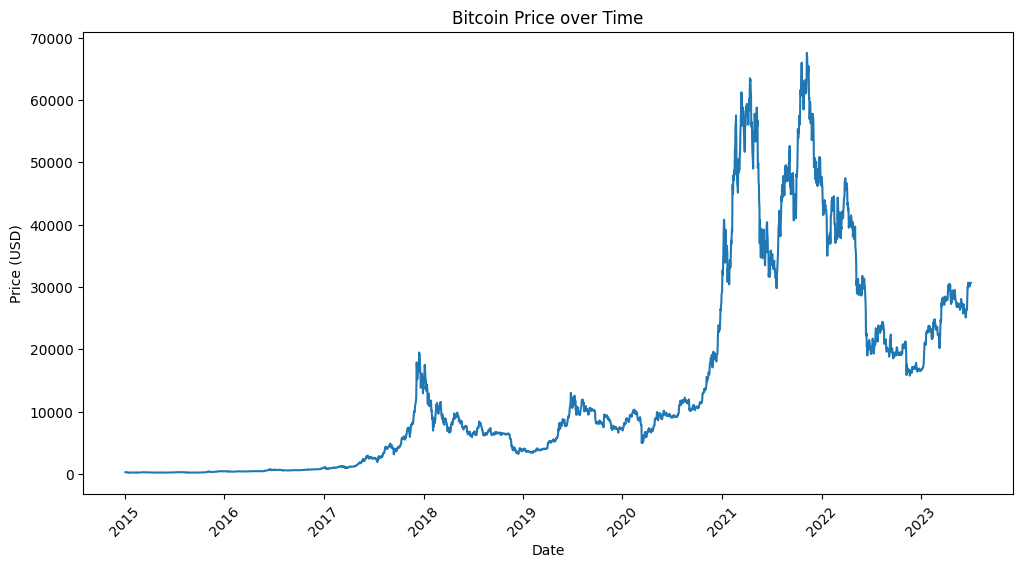

In [45]:
# Visualize Bitcoin price over time using a line plot
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'])
plt.title('Bitcoin Price over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.show()

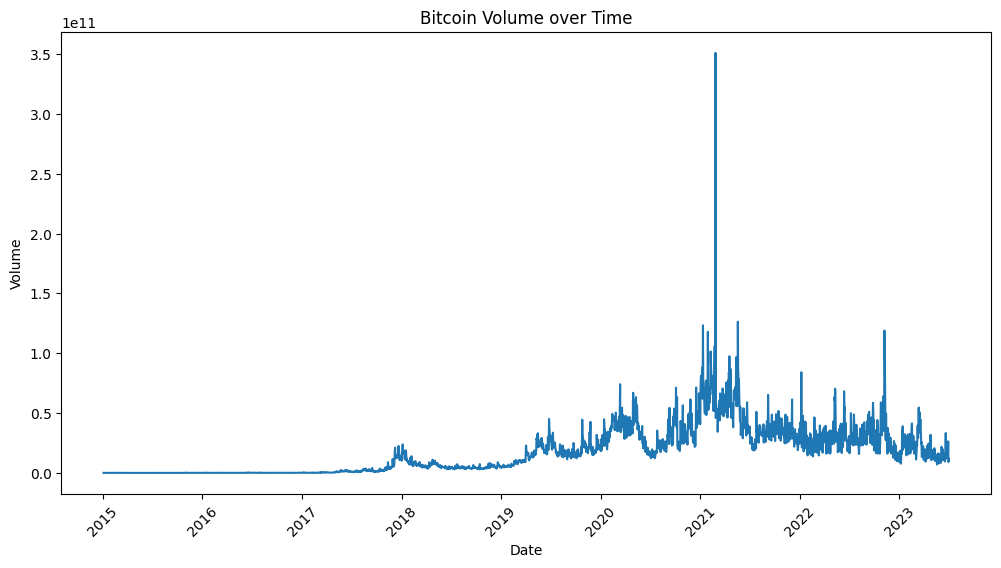

In [46]:
# Visualize Bitcoin volume over time using a line plot
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volume'])
plt.title('Bitcoin Volume over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.show()

In [47]:
# Calculate basic statistics for Bitcoin prices and volumes
price_stats = df['Close'].describe()
volume_stats = df['Volume'].describe()

print("Price Statistics:")
print(price_stats)

print("\nVolume Statistics:")
print(volume_stats)

Price Statistics:
count     3104.000000
mean     14049.414854
std      16093.557426
min        178.102997
25%       1037.797515
50%       8050.035400
75%      20648.897949
max      67566.828125
Name: Close, dtype: float64

Volume Statistics:
count    3.104000e+03
mean     1.715624e+10
std      1.962263e+10
min      1.060090e+07
25%      2.255415e+08
50%      1.216461e+10
75%      2.825679e+10
max      3.509679e+11
Name: Volume, dtype: float64


In [48]:
# Define criteria for bull and bear markets
bull_threshold = 0.1  # Percentage change threshold for bull market (e.g., 10% increase)
bear_threshold = -0.1  # Percentage change threshold for bear market (e.g., 10% decrease)

# Calculate the percentage change in Bitcoin prices
df['Price_Change'] = df['Close'].pct_change()

# Create a new column indicating the market cycle
df['Market_Cycle'] = 'Neutral'  # Initialize all values as 'Neutral'

# Apply the criteria to identify bull and bear markets
df.loc[df['Price_Change'] > bull_threshold, 'Market_Cycle'] = 'Bull'
df.loc[df['Price_Change'] < bear_threshold, 'Market_Cycle'] = 'Bear'

# Print the first few rows of the dataset with the market cycle column
print(df.head())

        Date        Open        High         Low       Close   Adj Close  \
0 2015-01-03  314.846008  315.149994  281.082001  281.082001  281.082001   
1 2015-01-04  281.145996  287.230011  257.612000  264.195007  264.195007   
2 2015-01-05  265.084015  278.341003  265.084015  274.473999  274.473999   
3 2015-01-06  274.610992  287.553009  272.696014  286.188995  286.188995   
4 2015-01-07  286.076996  298.753998  283.079010  294.337006  294.337006   

     Volume  Price_Change Market_Cycle  
0  33054400           NaN      Neutral  
1  55629100     -0.060079      Neutral  
2  43962800      0.038907      Neutral  
3  23245700      0.042682      Neutral  
4  24866800      0.028471      Neutral  


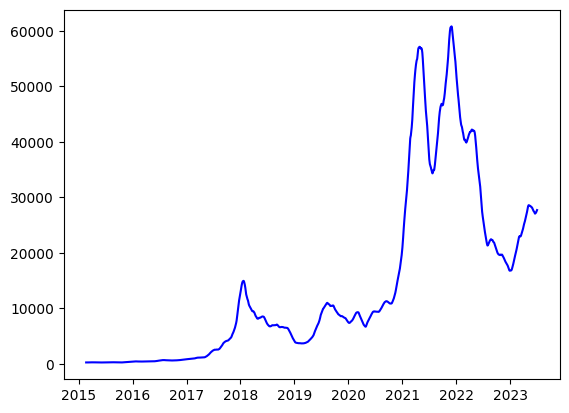

In [49]:
moving_avg = df['Close'].rolling(window=50).mean()
plt.plot(df['Date'], moving_avg, color='blue', label='50-day Moving Average')

# Show the plot
plt.show()


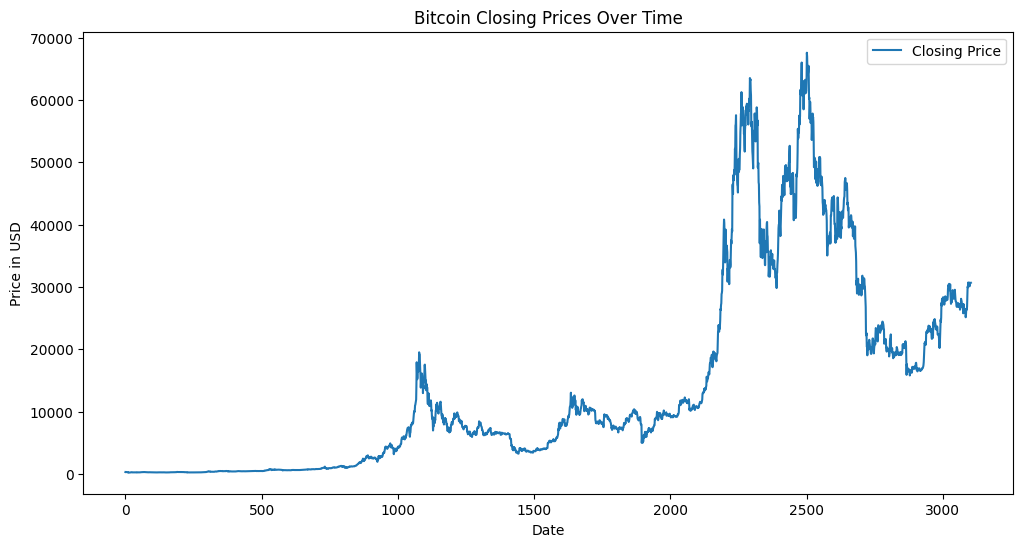

In [50]:
# Plotting the closing prices
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Closing Price')
plt.title('Bitcoin Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.show()

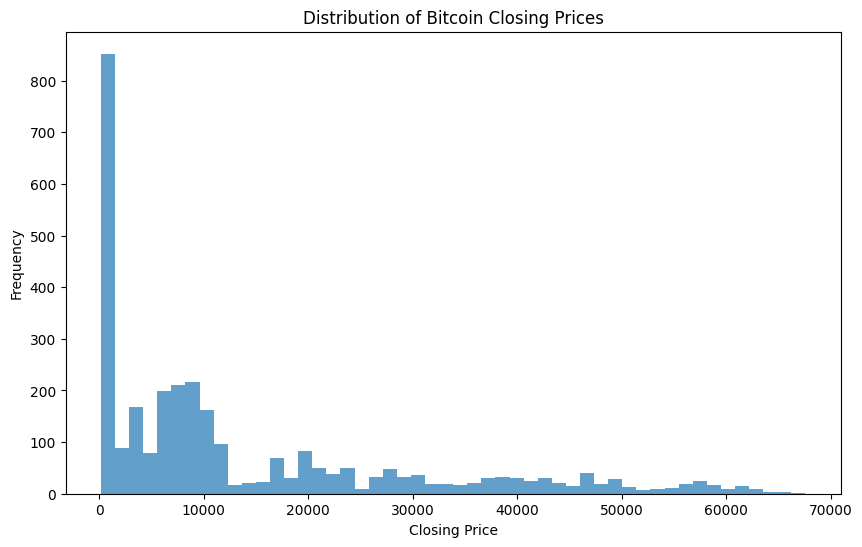

In [51]:
# Plotting a histogram to understand the distribution of closing prices
plt.figure(figsize=(10,6))
plt.hist(df['Close'], bins=50, alpha=0.7)
plt.title('Distribution of Bitcoin Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()


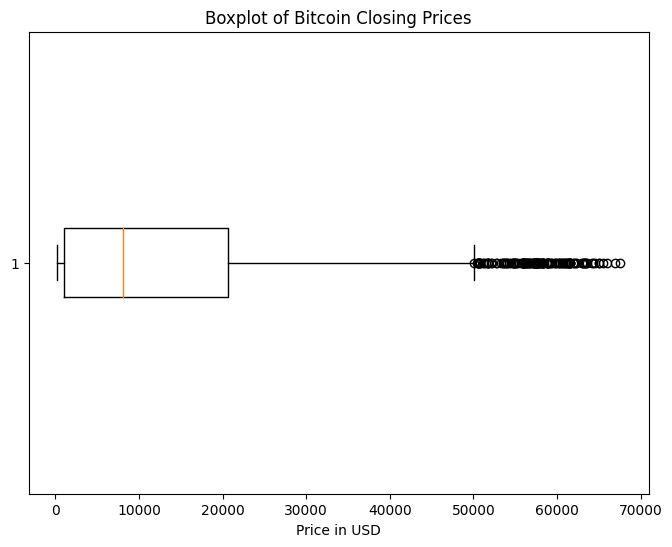

In [52]:
# Using a boxplot to identify outliers in closing prices
plt.figure(figsize=(8,6))
plt.boxplot(df['Close'], vert=False)
plt.title('Boxplot of Bitcoin Closing Prices')
plt.xlabel('Price in USD')
plt.show()

In [100]:
df['Daily_Percent_Change'] = df['Close'].pct_change() * 100  # Multiply by 100 to convert to percentage


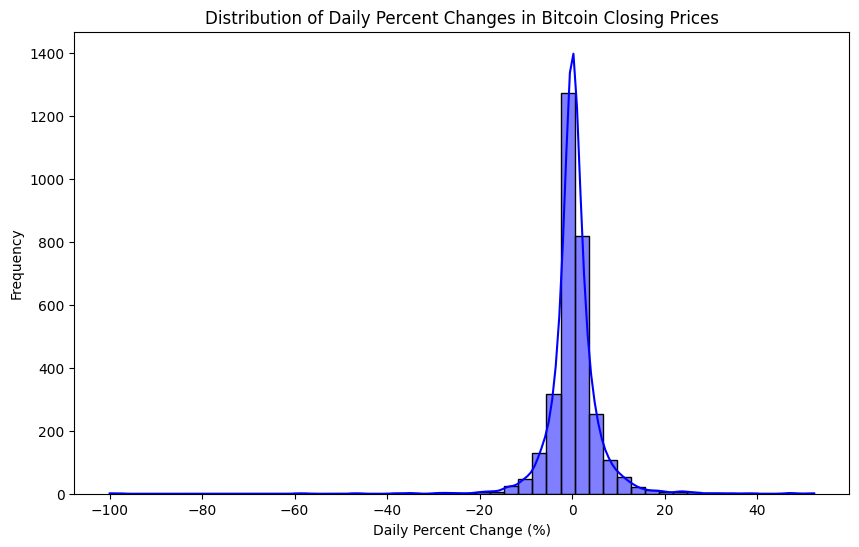

In [101]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Daily_Percent_Change'].dropna(), bins=50, kde=True, color='blue')  # dropna() to remove NaN values from the plot
plt.title('Distribution of Daily Percent Changes in Bitcoin Closing Prices')
plt.xlabel('Daily Percent Change (%)')
plt.ylabel('Frequency')
plt.show()

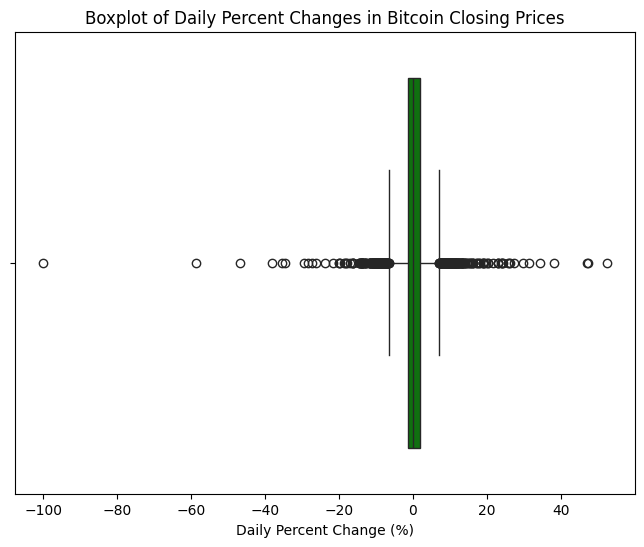

In [102]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Daily_Percent_Change'], color='green')
plt.title('Boxplot of Daily Percent Changes in Bitcoin Closing Prices')
plt.xlabel('Daily Percent Change (%)')
plt.show()


In [53]:
# Checking for missing values
missing_values = df.isnull().sum()
print('Missing values in each column:\n', missing_values)

Missing values in each column:
 Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Price_Change    1
Market_Cycle    0
dtype: int64


In [54]:
mapping = {'Neutral': 0, 'Bear': -1, 'Bull': 1}  # Adjust mapping as necessary
df['Price_Change'] = df['Price_Change'].replace(mapping)


In [55]:
print(df.info())  # Check data types
print(df.head())  # Inspect the first few rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3104 entries, 0 to 3103
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3104 non-null   datetime64[ns]
 1   Open          3104 non-null   float64       
 2   High          3104 non-null   float64       
 3   Low           3104 non-null   float64       
 4   Close         3104 non-null   float64       
 5   Adj Close     3104 non-null   float64       
 6   Volume        3104 non-null   int64         
 7   Price_Change  3103 non-null   float64       
 8   Market_Cycle  3104 non-null   object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 218.4+ KB
None
        Date        Open        High         Low       Close   Adj Close  \
0 2015-01-03  314.846008  315.149994  281.082001  281.082001  281.082001   
1 2015-01-04  281.145996  287.230011  257.612000  264.195007  264.195007   
2 2015-01-05  265.084015  27

In [56]:
# Identifying outliers (for example, in the 'Close' column)
Q1 = df['Close'].quantile(0.25)
Q3 = df['Close'].quantile(0.75)
IQR = Q3 - Q1

# Defining bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Handling outliers (e.g., capping)
df['Close'] = df['Close'].clip(lower=lower_bound, upper=upper_bound)

In [57]:
# Feature Engineering (e.g., creating a 'Daily Return' feature)
df['Daily Return'] = df['Close'].pct_change()

# Normalizing data (Min-Max scaling)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Assuming you want to scale 'Close' and 'Volume' columns
df[['Close', 'Volume']] = scaler.fit_transform(df[['Close', 'Volume']])

In [58]:
# Simple Linear Regression: Predicting 'Close' based on 'Volume'
X = df['Volume']  # Predictor variable
y = df['Close']   # Response variable

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Fitting the regression model
model = sm.OLS(y, X).fit()

# Summary of the model
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     3056.
Date:                Thu, 02 May 2024   Prob (F-statistic):               0.00
Time:                        00:39:42   Log-Likelihood:                 351.53
No. Observations:                3104   AIC:                            -699.1
Df Residuals:                    3102   BIC:                            -687.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0837      0.005     16.250      0.0

In [59]:
# Selecting features
X = df[['Open', 'High', 'Low', 'Volume']]  # You can choose other columns as well

# Selecting the target variable
y = df['Close']


In [60]:
df['Close_Lag1'] = df['Close'].shift(1)  # This creates a new column where each row is the previous day's 'Close' price

# Adjusting the features and target variable
X = df[['Open', 'High', 'Low', 'Volume', 'Close_Lag1']].dropna()  # Include the lagged feature
y = df['Close'].shift(-1).dropna()  # Predicting the next day's 'Close' price

In [61]:
 # Random Forest Example
def random_forest_model(X, y):
    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the Random Forest Regressor
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

    # Fit the model
    rf_model.fit(X_train, y_train)

    # Make predictions
    y_pred = rf_model.predict(X_test)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    print("Random Forest MSE:", mse)

# Gradient Boosting Example
def gradient_boosting_model(X, y):
    # Splitting the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize Gradient Boosting Regressor
    gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

    # Fit the model
    gb_model.fit(X_train, y_train)

    # Predict
    y_pred = gb_model.predict(X_test)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    print("Gradient Boosting MSE:", mse)

In [62]:
# LSTM Example
def lstm_model(data, feature_columns, target_column):
    # Preparing data for LSTM
    data = data[feature_columns + [target_column]]
    data_scaled = data.values

    # Generator for the time series
    n_input = 3  # number of steps
    n_features = len(feature_columns)
    generator = TimeseriesGenerator(data_scaled, data_scaled[:, -1], length=n_input, batch_size=1)

    # LSTM model
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(n_input, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Fit model
    model.fit(generator, steps_per_epoch=1, epochs=200, verbose=1)

    return model

In [63]:

time_steps = 5  # Example: using 5 days of prices to predict the next day
df_lagged = pd.concat([df['Close'].shift(i) for i in range(time_steps, -1, -1)], axis=1)

# Drop missing values created by lagging
df_lagged.dropna(inplace=True)

# Features and labels
X = df_lagged.iloc[:, :-1].values
y = df_lagged.iloc[:, -1].values

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshaping X for LSTM input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Scaling the features
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [64]:
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(units=50),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
78/78 [==============================] - 6s 8ms/step - loss: 0.0178
Epoch 2/100
78/78 [==============================] - 1s 9ms/step - loss: 5.5918e-04
Epoch 3/100
78/78 [==============================] - 1s 8ms/step - loss: 4.2247e-04
Epoch 4/100
78/78 [==============================] - 1s 8ms/step - loss: 4.0410e-04
Epoch 5/100
78/78 [==============================] - 1s 8ms/step - loss: 3.8841e-04
Epoch 6/100
78/78 [==============================] - 1s 9ms/step - loss: 4.0024e-04
Epoch 7/100
78/78 [==============================] - 1s 8ms/step - loss: 4.1089e-04
Epoch 8/100
78/78 [==============================] - 1s 9ms/step - loss: 3.8809e-04
Epoch 9/100
78/78 [==============================] - 1s 8ms/step - loss: 4.1168e-04
Epoch 10/100
78/78 [==============================] - 1s 8ms/step - loss: 3.9842e-04
Epoch 11/100
78/78 [==============================] - 1s 8ms/step - loss: 3.9461e-04
Epoch 12/100
78/78 [==============================] - 1s 8ms/step - loss: 3.76

20/20 [==============================] - 1s 3ms/step


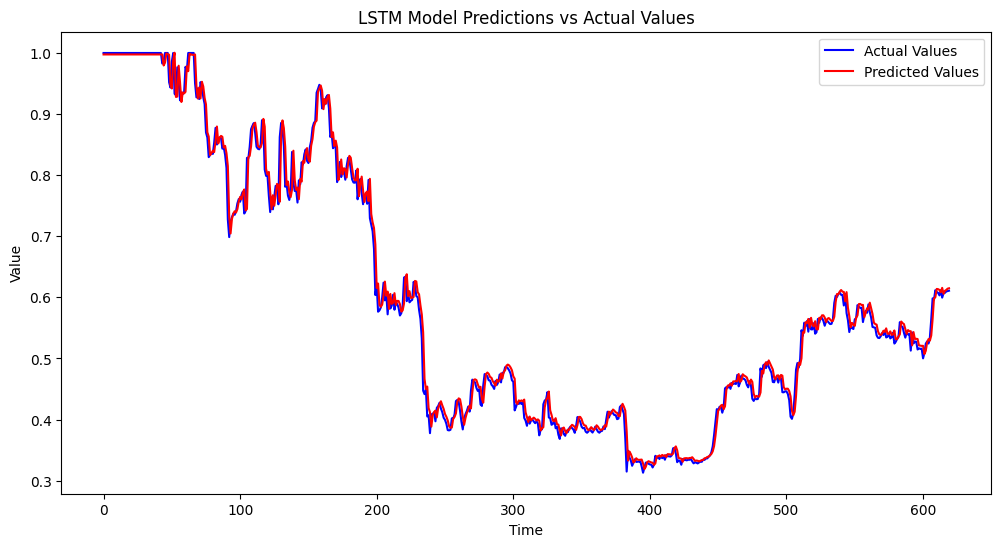

In [65]:
# Assuming 'model' is your trained LSTM model and you have X_test_scaled and y_test ready
# Make predictions
predictions = model.predict(X_test_scaled)

# Visualizing the predictions vs actual values
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Actual Values', color='blue')
plt.plot(predictions, label='Predicted Values', color='red')
plt.title('LSTM Model Predictions vs Actual Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [66]:
# Assuming you have the true values 'y_test' and the predictions 'predictions'
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)

Mean Absolute Error (MAE): 0.012056574250823224
Mean Squared Error (MSE): 0.0003420523566297368
Root Mean Squared Error (RMSE): 0.018494657515881086


In [67]:
# Create the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Assuming X_train and X_test are your data arrays with shape [samples, time steps, features]
# Reshape to 2D
num_samples, num_time_steps, num_features = X_train.shape
X_train_reshaped = X_train.reshape((num_samples * num_time_steps, num_features))

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train_reshaped)

# Transform the test data
num_samples_test, _, _ = X_test.shape
X_test_reshaped = X_test.reshape((num_samples_test * num_time_steps, num_features))
X_test_scaled = scaler.transform(X_test_reshaped)

# Reshape back to 3D
X_train_scaled = X_train_scaled.reshape((num_samples, num_time_steps, num_features))
X_test_scaled = X_test_scaled.reshape((num_samples_test, num_time_steps, num_features))


In [68]:
# Define your LSTM model architecture
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/100
62/62 [==============================] - 6s 32ms/step - loss: 0.0019 - val_loss: 0.0027
Epoch 2/100
62/62 [==============================] - 1s 9ms/step - loss: 2.3628e-04 - val_loss: 0.0016
Epoch 3/100
62/62 [==============================] - 1s 9ms/step - loss: 2.0784e-04 - val_loss: 0.0044
Epoch 4/100
62/62 [==============================] - 1s 10ms/step - loss: 2.3332e-04 - val_loss: 0.0040
Epoch 5/100
62/62 [==============================] - 1s 9ms/step - loss: 1.9401e-04 - val_loss: 0.0036
Epoch 6/100
62/62 [==============================] - 1s 9ms/step - loss: 1.9126e-04 - val_loss: 0.0076
Epoch 7/100
62/62 [==============================] - 1s 9ms/step - loss: 2.0442e-04 - val_loss: 0.0072
Epoch 8/100
62/62 [==============================] - 1s 9ms/step - loss: 1.7302e-04 - val_loss: 0.0074
Epoch 9/100
62/62 [==============================] - 1s 10ms/step - loss: 2.0144e-04 - val_loss: 0.0100
Epoch 10/100
62/62 [==============================] - 1s 9ms/step - loss: 

In [69]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test_scaled, y_test, verbose=1)

# Calculate evaluation metrics
predictions = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

20/20 [==============================] - 1s 5ms/step


In [70]:
df['Moving_Average'] = df['Close'].rolling(window=5).mean()



20/20 [==============================] - 0s 5ms/step


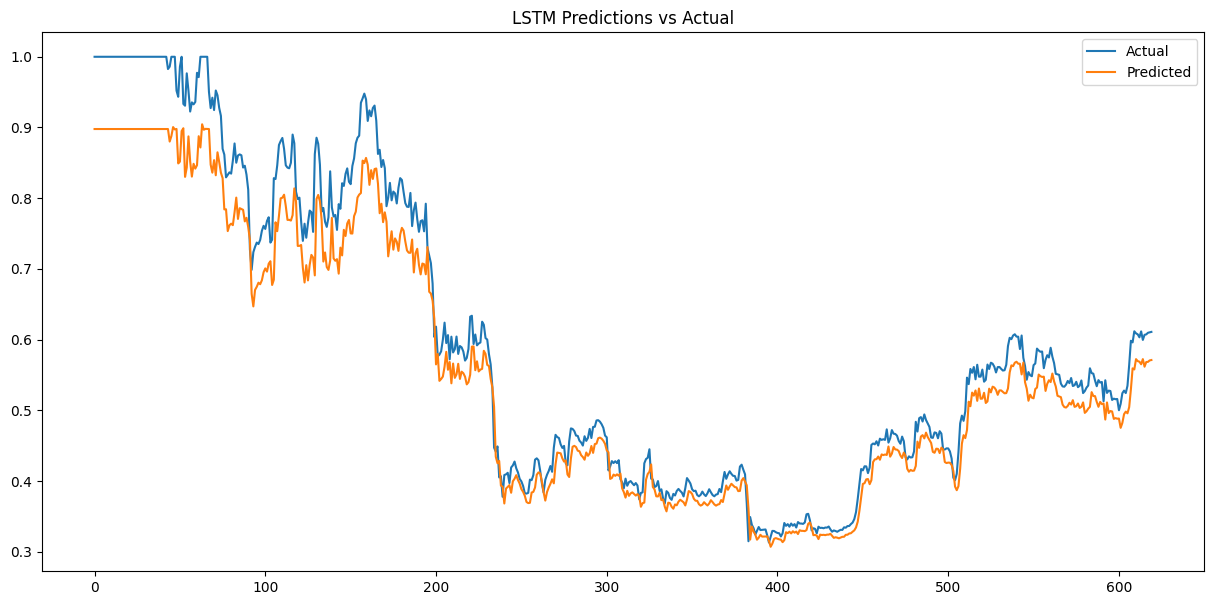

In [71]:
# Predict
predictions = model.predict(X_test_scaled)

# Visualize
plt.figure(figsize=(15, 7))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('LSTM Predictions vs Actual')
plt.legend()
plt.show()


In [72]:
# Assuming predictions and y_test were scaled
predictions_original = scaler.inverse_transform(predictions)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))


In [73]:
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,  # Keras automatically holds out this fraction of the training data for validation
    verbose=1
)


Epoch 1/100
62/62 [==============================] - 1s 17ms/step - loss: 1.0621e-04 - val_loss: 0.0044
Epoch 2/100
62/62 [==============================] - 1s 11ms/step - loss: 1.2190e-04 - val_loss: 0.0051
Epoch 3/100
62/62 [==============================] - 1s 10ms/step - loss: 9.4679e-05 - val_loss: 0.0040
Epoch 4/100
62/62 [==============================] - 1s 9ms/step - loss: 8.6624e-05 - val_loss: 0.0029
Epoch 5/100
62/62 [==============================] - 1s 10ms/step - loss: 9.8174e-05 - val_loss: 0.0024
Epoch 6/100
62/62 [==============================] - 1s 9ms/step - loss: 9.1915e-05 - val_loss: 0.0049
Epoch 7/100
62/62 [==============================] - 1s 10ms/step - loss: 1.0208e-04 - val_loss: 0.0018
Epoch 8/100
62/62 [==============================] - 1s 9ms/step - loss: 9.6200e-05 - val_loss: 0.0030
Epoch 9/100
62/62 [==============================] - 1s 10ms/step - loss: 8.3353e-05 - val_loss: 0.0051
Epoch 10/100
62/62 [==============================] - 1s 10ms/step 

In [74]:
# Assuming y_true are the true labels and y_pred are the model's predictions
y_true = [...]  # replace with actual true labels
y_pred = [...]  # replace with actual predictions


In [77]:
y_true = np.array(y_true, dtype=object)
y_pred = np.array(y_pred, dtype=object)



In [78]:
# Check if they are of equal length
if len(y_true) != len(y_pred):
    raise ValueError("The length of y_true and y_pred must be the same.")


In [79]:
# Check if the input types are numeric or strings and handle accordingly
if np.issubdtype(y_true.dtype, np.number) and np.issubdtype(y_pred.dtype, np.number):
    # If numeric, check for NaN values directly
    if np.isnan(y_true).any() or np.isnan(y_pred).any():
        raise ValueError("NaN values found in input arrays.")
else:
    # If not numeric (e.g., strings), convert to integers using LabelEncoder
    le = LabelEncoder()
    y_true = le.fit_transform(y_true)
    y_pred = le.transform(y_pred)


In [80]:
# Now y_true and y_pred should be numeric, you can safely calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='binary')
recall = recall_score(y_true, y_pred, average='binary')
f1 = f1_score(y_true, y_pred, average='binary')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


In [81]:
# Output the results
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 1.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


In [82]:
# This step is only necessary if your labels are categorical (e.g., 'yes', 'no')
label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_true)
y_pred_encoded = label_encoder.transform(y_pred)

In [83]:
# Replace y_true and y_pred with y_true_encoded and y_pred_encoded if you performed encoding
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='binary')  # or 'macro'/'micro'/'weighted' for multiclass
recall = recall_score(y_true, y_pred, average='binary')  # ditto
f1 = f1_score(y_true, y_pred, average='binary')  # ditto

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 1.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


In [84]:
# Assuming y_true is a numpy array or a list
class_distribution = pd.Series(y_true).value_counts()
print(class_distribution)

0    1
Name: count, dtype: int64


In [85]:
# Print first 10 true and predicted labels
print("True labels:", y_true[:10])
print("Predicted labels:", y_pred[:10])

True labels: [0]
Predicted labels: [0]


In [86]:
# Convert it to numerical form using LabelEncoder if it's not already numerical
if df['Price_Change'].dtype == 'object':
    le = LabelEncoder()
    df['Price_Change'] = le.fit_transform(df['Price_Change'])

# Split data into features and target variable
X = df.drop('Price_Change', axis=1)
y = df['Price_Change']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [90]:
df['Date'] = pd.to_datetime(df['Date']).apply(lambda x: x.timestamp())


In [91]:
# Split data into features and target
X = df.drop('Price_Change', axis=1)
y = df['Price_Change']


In [88]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
# Initialize the Logistic Regression model
model = LogisticRegression()

In [92]:
# Assuming 'Neutral' is a category in the 'Market_Cycle' column
df = pd.get_dummies(df, columns=['Market_Cycle'])


In [93]:
print(df.columns)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Price_Change', 'Daily Return', 'Close_Lag1', 'Moving_Average',
       'Market_Cycle_Bear', 'Market_Cycle_Bull', 'Market_Cycle_Neutral'],
      dtype='object')


In [94]:
# Assuming 'Price_Change' is your target variable
target_column_name = 'Price_Change'

# Features selection (excluding the target column and the 'Date' column)
features_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
                    'Daily Return', 'Close_Lag1', 'Moving_Average',
                    'Market_Cycle_Bear', 'Market_Cycle_Bull', 'Market_Cycle_Neutral']

# Split data into features (X) and target (y)
X = df[features_columns]
y = df[target_column_name]

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [97]:
import numpy as np

# Check for NaN or infinite values in y_test and y_pred
print("NaN in y_test:", np.isnan(y_test).any())
print("Inf in y_test:", np.isinf(y_test).any())

print("NaN in y_pred:", np.isnan(y_pred).any())
print("Inf in y_pred:", np.isinf(y_pred).any())


NaN in y_test: True
Inf in y_test: False
NaN in y_pred: False
Inf in y_pred: False


In [98]:
# Assuming replacement is appropriate
y_test = np.nan_to_num(y_test, nan=np.nanmean(y_test), posinf=np.max(y_test[np.isfinite(y_test)]), neginf=np.min(y_test[np.isfinite(y_test)]))
y_pred = np.nan_to_num(y_pred, nan=np.nanmean(y_pred), posinf=np.max(y_pred[np.isfinite(y_pred)]), neginf=np.min(y_pred[np.isfinite(y_pred)]))


In [99]:
# Impute missing values with median
imputer = SimpleImputer(strategy='median')

# Create a pipeline that first imputes the data then fits the model
pipeline = make_pipeline(imputer, RandomForestRegressor(random_state=42))

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 2.7907882541485532e-05
R-squared: 0.978839715611334


In [106]:
X = np.random.rand(100, 10)  # 100 samples, 10 features
y = np.random.rand(100)  # 100 target values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate MSE for both sets
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

Training MSE: 0.012767087850540204
Test MSE: 0.09940926131551633


In [107]:
data = {
    'A': np.random.randn(100),
    'B': np.random.randn(100) * 100,
    'C': np.random.rand(100) * 10
}
df = pd.DataFrame(data)

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Calculate outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("Outliers per column:\n", outliers)


Missing values per column:
 A    0
B    0
C    0
dtype: int64
Outliers per column:
 A    2
B    0
C    0
dtype: int64


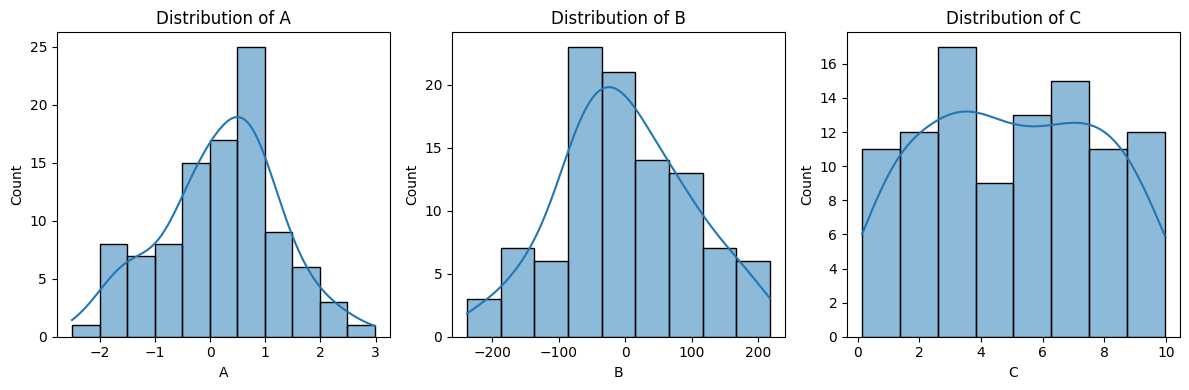

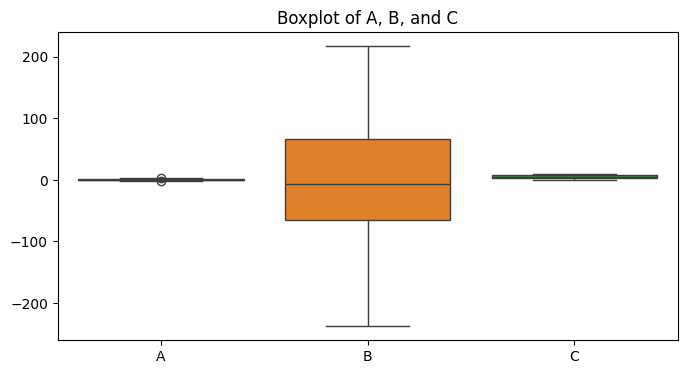

In [108]:
# Histograms for visualizing distributions
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(df['A'], kde=True)
plt.title('Distribution of A')

plt.subplot(1, 3, 2)
sns.histplot(df['B'], kde=True)
plt.title('Distribution of B')

plt.subplot(1, 3, 3)
sns.histplot(df['C'], kde=True)
plt.title('Distribution of C')
plt.tight_layout()
plt.show()

# Box plots to visualize outliers
plt.figure(figsize=(8, 4))
sns.boxplot(data=df[['A', 'B', 'C']])
plt.title('Boxplot of A, B, and C')
plt.show()

In [109]:
Q1 = df['A'].quantile(0.25)
Q3 = df['A'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_filtered = df[(df['A'] >= lower_bound) & (df['A'] <= upper_bound)]


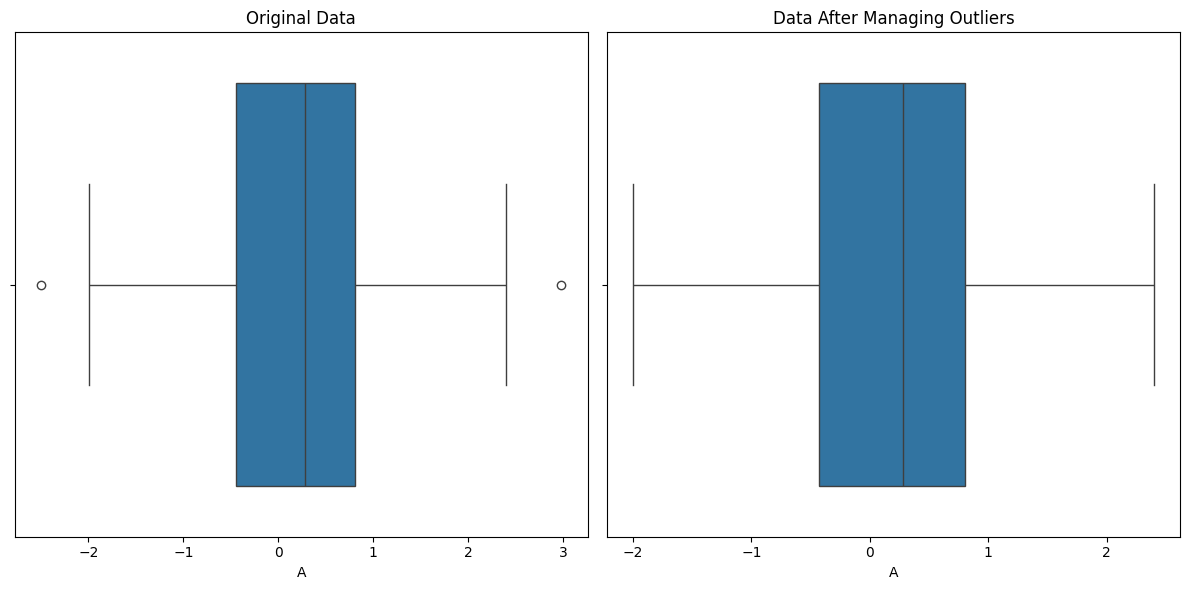

In [110]:
# Original Data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['A'])
plt.title('Original Data')

# Data after handling outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=df_filtered['A'] if 'df_filtered' in locals() else df['A'])
plt.title('Data After Managing Outliers')

plt.tight_layout()
plt.show()

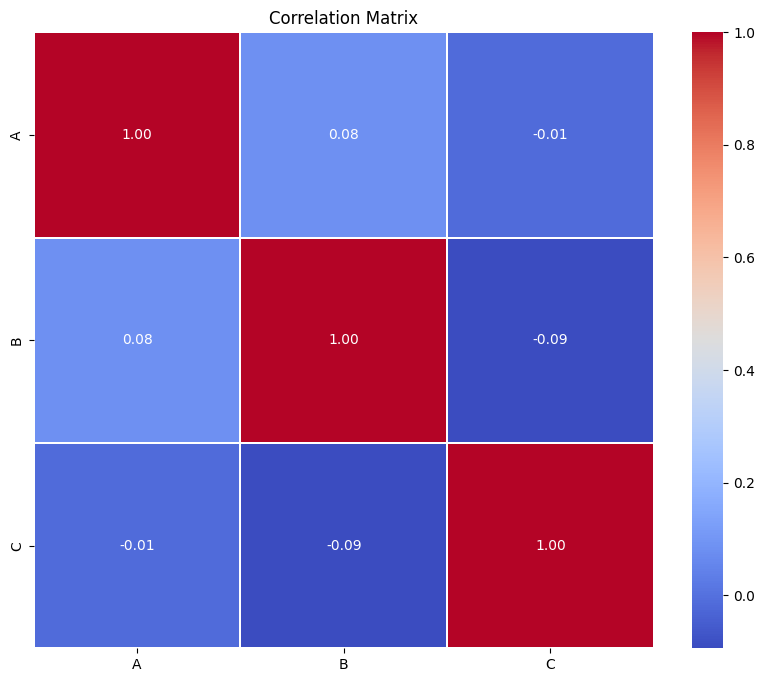

In [111]:
# Assuming df is your DataFrame with relevant Bitcoin data
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.05)
plt.title('Correlation Matrix')
plt.show()

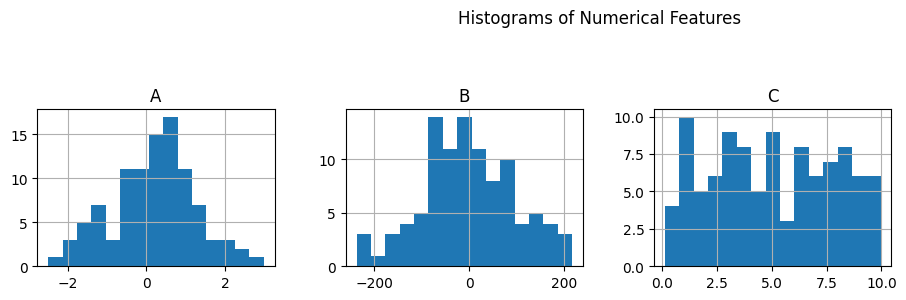

In [112]:
df.hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.suptitle('Histograms of Numerical Features')
plt.show()

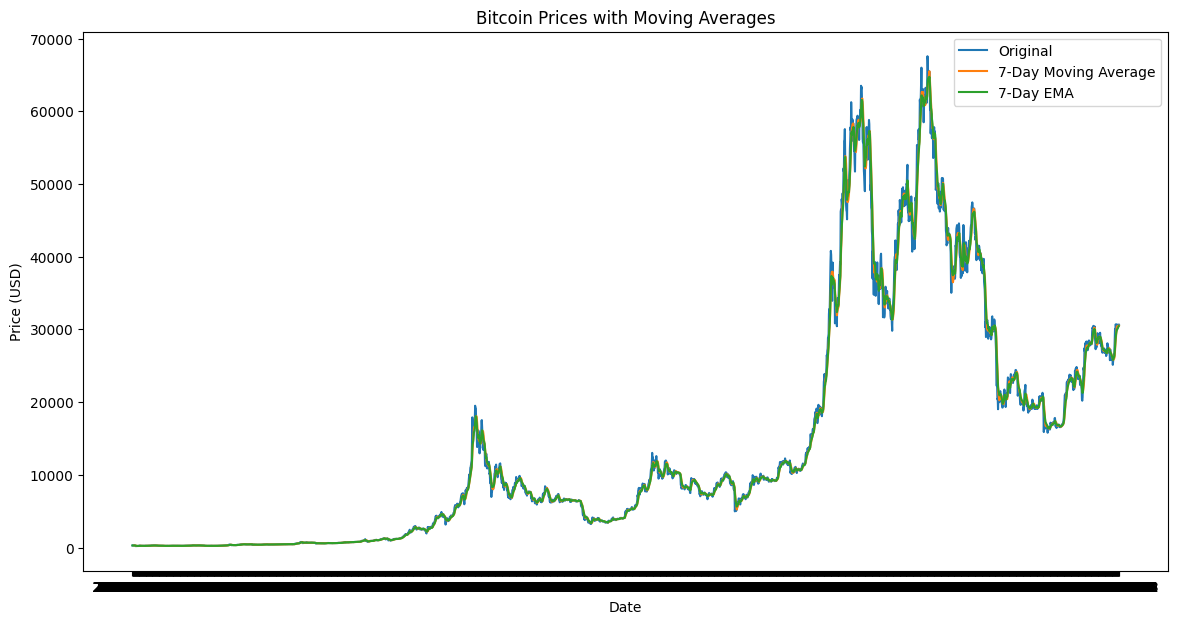

In [126]:
df['Moving_Average_7d'] = df['Close'].rolling(window=7).mean()

# Create an exponential moving average
df['EMA_7d'] = df['Close'].ewm(span=7, adjust=False).mean()

plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Original')
plt.plot(df['Date'], df['Moving_Average_7d'], label='7-Day Moving Average')
plt.plot(df['Date'], df['EMA_7d'], label='7-Day EMA')
plt.title('Bitcoin Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

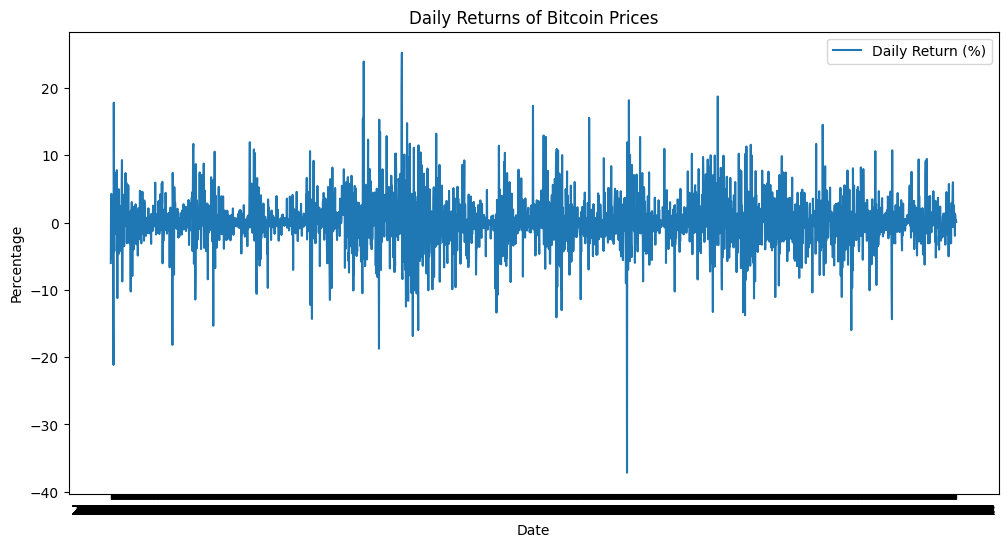

In [128]:
# Daily percentage change
df['Daily_Return'] = df['Close'].pct_change() * 100

# Plot daily returns
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Daily_Return'], label='Daily Return (%)')
plt.title('Daily Returns of Bitcoin Prices')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.legend()
plt.show()



In [129]:
# Create lagged features
df['Lag_1'] = df['Close'].shift(1)
df['Lag_2'] = df['Close'].shift(2)

# Drop NaN values that were created due to shifting
df.dropna(inplace=True)


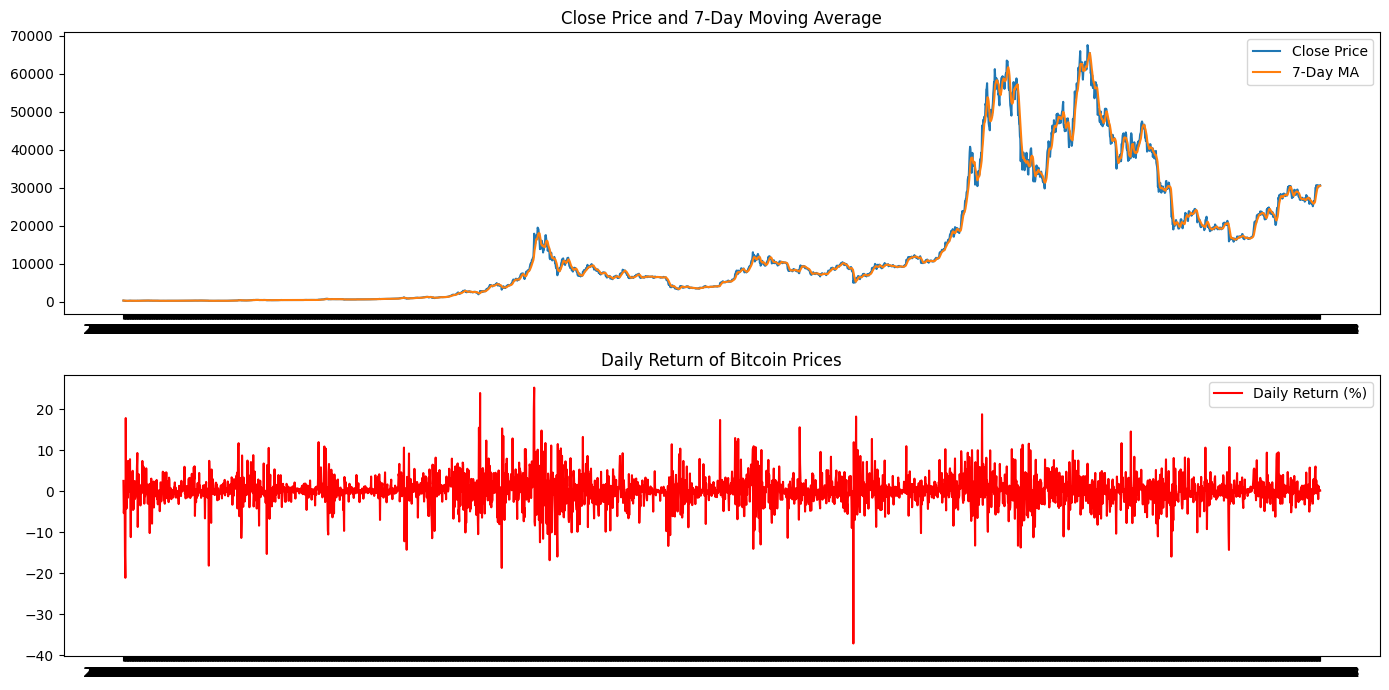

In [130]:
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['Moving_Average_7d'], label='7-Day MA')
plt.title('Close Price and 7-Day Moving Average')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df['Date'], df['Daily_Return'], label='Daily Return (%)', color='red')
plt.title('Daily Return of Bitcoin Prices')
plt.legend()
plt.tight_layout()
plt.show()
